In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install "stable-baselines3[extra]" protobuf==3.20.*


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install mss pydirectinput pytesseract


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install gym

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from mss import mss
import pydirectinput
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import time
from gymnasium import Env
from gymnasium.spaces import Box, Discrete

In [95]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        # Setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        # Capture game frames
        self.cap = mss()
        self.game_location = {'top': 300, 'left': 0, 'width': 600, 'height': 500}
        self.done_location = {'top': 405, 'left': 630, 'width': 660, 'height': 70}

    def step(self, action):
        pass
        action_map = {
            0:'space',
            1: 'down', 
            2: 'no_op'
        }
        if action !=2:
            pydirectinput.press(action_map[action])

        res,done, done_cap = self.get_done() 
        observation = self.get_observation()
        reward = 1 
        info = {}
        return observation, reward, done, info

    def reset(self):
        time.sleep(1)
        pydirectinput.click(x=150, y=150)
        pydirectinput.press('space')
        return self.get_observation()

    def render(self):
        
        screenshot = self.cap.grab(self.game_location)
        if screenshot is None:
            print("Failed to capture screen - check your game_location coordinates")
            return
    
        img_array = np.array(screenshot)[:,:,:3]
        cv2.imshow('Game', img_array)
    
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()
    
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()
         
    def close(self):
        cv2.destroyAllWindows()
    
    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100,83))
        channel = np.reshape(resized, (1,83,100))
        return channel
    
    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        done_strings = ['GAME', 'GAHE']
        done=False
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        return res,done, done_cap
        
    

In [96]:
env=WebGame()

In [97]:
# obs=env.get_observation()


In [98]:
env.render()

In [99]:
env.close()

In [100]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [103]:
res,done,done_cap=env.get_done()

In [104]:
res

'GAME'

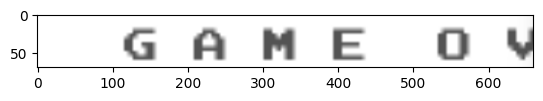

In [105]:
plt.imshow(done_cap)

In [106]:
#testing our environment

In [107]:
env=WebGame()

In [108]:
obs=env.get_observation()

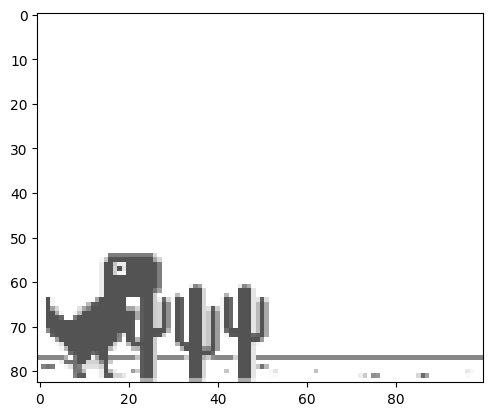

In [109]:
plt.imshow(cv2.cvtColor(obs[0],cv2.COLOR_BGR2RGB))

In [110]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [111]:
res, done, done_cap = env.get_done()
print(done)
result = pytesseract.image_to_string(done_cap)[:4]
print(result)

True
GAME


In [ ]:
for episode in range(10):
    obs=env.reset()
    done=False
    total_reward=0

    while not done:
        obs,reward,done,info=env.step(env.action_space.sample())
        total_reward+=reward
        print(f'Total reward for episode {episode} is {total_reward}')